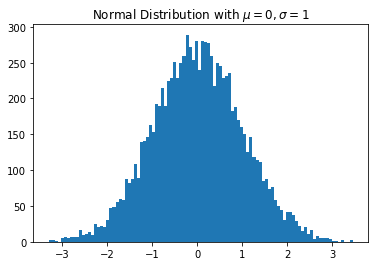

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
x=np.random.randn(10000)
plt.hist(x,100)
plt.title(r"Normal Distribution with $\mu=0, \sigma=1$")
plt.show()

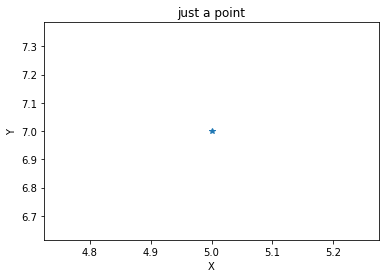

In [3]:
plt.plot(5,7,'*')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("just a point")
plt.show()

In [4]:
import pandas as pd

In [5]:
data={'India':[8880,8670,8147,7338,5704],'China':[5123,6682,3308,1863,1527]}

In [6]:
data

{'India': [8880, 8670, 8147, 7338, 5704],
 'China': [5123, 6682, 3308, 1863, 1527]}

In [7]:
Data_index=[1980,1981,1982,1983,1984]

In [8]:
df=pd.DataFrame(data=data,index=Data_index)

In [9]:
df

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


<IPython.core.display.Javascript object>


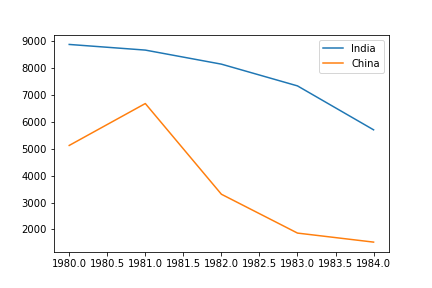

<AxesSubplot:>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook 
df.plot(kind='line')

<IPython.core.display.Javascript object>


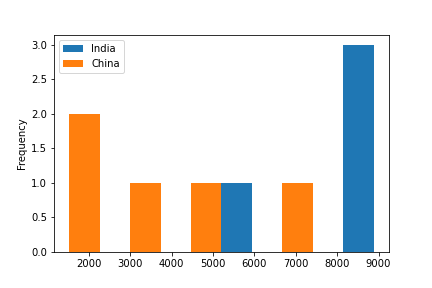

<AxesSubplot:ylabel='Frequency'>

In [11]:
df.plot(kind='hist')

In [1]:
!pip install xlrd
print("xlrd installed")

xlrd installed


In [2]:
 create df_countries dataframe
    df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
    df_total = pd.DataFrame(df_countries.sum(axis=1))

    # reset index in place
    df_total.reset_index(inplace=True)

    # rename columns
    df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
    df_total['year'] = df_total['year'].astype(int)

    # define figure size
    plt.figure(figsize=(15, 10))

    # define background style and font size
    sns.set(font_scale=1.5)
    sns.set_style('whitegrid')

    # generate plot and add title and axes labels
    ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
    ax.set(xlabel='Year', ylabel='Total Immigration')
    ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

SyntaxError: invalid syntax (3807024525.py, line 1)

## New session folium map

In [15]:
!pip install folium

In [3]:
import numpy as np
import pandas as pd
import folium

In [4]:
## define the world map 
world_map=folium.Map()

## display
world_map

In [5]:
world_map=folium.Map(location=[0,0],zoom_start=3,tiles='Stamen Terrain')
# display the map 
world_map

In [6]:
world_map=folium.Map(location=[56.130,-106.35],zoom_start=8,tiles='Stamen Terrain')
world_map

In [7]:
## define geo location of Mexico
Mexico_latitude=23.6345
Mexico_longitude=-102.5528

world_map=folium.Map(location=[Mexico_latitude,Mexico_longitude],zoom_start=4)
world_map

In [8]:
world_map=folium.Map(location=[56.130,-106.35],zoom_start=4,tiles='Stamen Terrain')
world_map

In [11]:
## define geo location of Mexico
Mexico_latitude=23.6345
Mexico_longitude=-102.5528

world_map=folium.Map(location=[Mexico_latitude,Mexico_longitude],zoom_start=30,tiles='Stamen Terrain')
world_map

In [10]:

URL='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv'


df_incidents=pd.read_csv(URL)
print("dataset downloaded ")

dataset downloaded 


In [43]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [45]:
df_incidents.shape

(150500, 13)

In [47]:
## to get the first 100 crime of the dataset
limit=100
df_incidents=df_incidents.iloc[0:limit, :]


In [48]:
df_incidents.shape

(100, 13)

In [49]:
# san Franciso latitude and longitude
latitude=37.77
longitude=-122.42

In [50]:
### map
sanfran_map=folium.Map(location=[latitude,longitude],zoom_start=12)
sanfran_map

# Now let's superimpose the locations of the crimes onto the map. The way to do that in Folium is to create a feature group with its own features and style and then add it to the sanfran_map.

In [54]:
incidents=folium.map.FeatureGroup()

## loop through 100 crimes and add  each to the incident feature group
for lat, lng, in zip(df_incidents.Y,df_incidents.X):
    incidents.add_child(folium.features.CircleMarker([lat,lng],radius=5,color='black',
                                     fill=True,
                                     fill_color='blue',fill_opacity=0.6
                        )
    )
sanfran_map.add_child(incidents)

In [56]:
for lat, lng, label in zip(df_incidents.Y, df_incidents.X,df_incidents.Category):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    folium.Marker([lat,lng],popup=label).add_to(sanfran_map)
    
sanfran_map.add_child(incidents)


In [63]:
sanfran_map=folium.Map(location=[latitude,longitude],zoom_start=12)

for lat,lng,label in zip(df_incidents.Y,df_incidents.X,df_incidents.Category):
    folium.features.CircleMarker([lat,lng],radius=5,color='green',fill=True,popup=label,fill_color='blue',fill_opacity=0.6).add_to(sanfran_map)
sanfran_map

# The other proper remedy is to group the markers into different clusters. Each cluster is then represented by the number of crimes in each neighborhood. These clusters can be thought of as pockets of San Francisco which you can then analyze separately.

To implement this, we start off by instantiating a MarkerCluster object and adding all the data points in the dataframe to this object.

In [64]:
from folium import plugins
## create map
sanfran_map=folium.Map(location=[latitude,longitude],zoom_start=12)

# instantiate a mark cluster object for the incident in the dataframe
incidents=plugins.MarkerCluster().add_to(sanfran_map)
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],icon=None,popup=label).add_to(incidents)
sanfran_map


In [71]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

df_can = pd.read_excel(
    URL,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [72]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [74]:
df_can.shape

(195, 43)

In [81]:
## clean the dataset
#df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)
#df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.columns=list(map(str,df_can.columns))

df_can['Total']=df_can.loc[:,'1980':'2013'].sum(axis=1)

df_can.head()
years=list(map(str,range(1980,2014)))
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [82]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [86]:
!pip install js

  Created wheel for js: filename=js-1.0-py3-none-any.whl size=2899 sha256=d7f9b63fa9a75fa78e3b7192deefaa812ebdb52a3de779950c3aad893455f98b
  Stored in directory: c:\users\ravi\appdata\local\pip\cache\wheels\6f\91\12\9fc79cc62b07127faf39b5f3afcc6606e659bb54743a00bebb
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2781 sha256=08d5eda396717980ead88696631266dfe34b5dc21034ed488e2affc72d163c43
  Stored in directory: c:\users\ravi\appdata\local\pip\cache\wheels\84\c7\f5\fed66dce1ed897b44e0da776b6a592dfad0a70f7dd61f73a9d
Successfully built js shutilwhich


In [90]:
import js
import io
import json

In [93]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
resp = await js.fetch(URL)
data = io.BytesIO((await resp.arrayBuffer()).to_py())
world_geo = json.load(data)

print('GeoJSON file loaded!')

AttributeError: module 'js' has no attribute 'fetch'

In [94]:
import requests
import json

r=requests.get(URL)
j=r.json()
print(j)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.5

In [98]:
## create a plain world map
world_map=folium.Map(zoom_start=2)
world_map

In [102]:
## generate choropleth map using total immigration to canada from each country
world_map.choropleth(geo_data=j,data=df_can,columns=['Country','Total'],
                    key_on='feature.properties.name',fill_color='YlOrRd',
                    fill_opacity=0.6,fill_capacity=0.2,
                    legend_name='Immigration to Canada')
world_map

C:\Users\RAVI\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [103]:
# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=j,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map